In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [110]:
data = pd.read_csv('C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/data/processed/Data-final.csv')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      9840 non-null   float64
 1   longitude                     9840 non-null   float64
 2   temperature_celsius           9840 non-null   float64
 3   condition_text                9840 non-null   float64
 4   wind_mph                      9840 non-null   float64
 5   wind_degree                   9840 non-null   int64  
 6   wind_direction                9840 non-null   float64
 7   pressure_mb                   9840 non-null   float64
 8   pressure_in                   9840 non-null   float64
 9   precip_mm                     9840 non-null   float64
 10  precip_in                     9840 non-null   float64
 11  humidity                      9840 non-null   int64  
 12  cloud                         9840 non-null   int64  
 13  fee

In [112]:
data = data[['latitude' , 'longitude' ,'temperature_celsius' , 'feels_like_celsius' , 'pressure_mb' , 'humidity' ,  'wind_mph' , 'wind_degree' , 'cloud']]

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             9840 non-null   float64
 1   longitude            9840 non-null   float64
 2   temperature_celsius  9840 non-null   float64
 3   feels_like_celsius   9840 non-null   float64
 4   pressure_mb          9840 non-null   float64
 5   humidity             9840 non-null   int64  
 6   wind_mph             9840 non-null   float64
 7   wind_degree          9840 non-null   int64  
 8   cloud                9840 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 692.0 KB


In [114]:
conversion_factor = 273.15
data['temperature_celsius'] = data['temperature_celsius'].add(conversion_factor)
data['feels_like_celsius'] = data['feels_like_celsius'].add(conversion_factor)

In [115]:
new_column_name = 'temperature_kelvin'
data = data.rename(columns={'temperature_celsius': new_column_name})

In [116]:
new_column_name = 'feels_like_kelvin'
data = data.rename(columns={'feels_like_celsius': new_column_name})

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9840 non-null   float64
 1   longitude           9840 non-null   float64
 2   temperature_kelvin  9840 non-null   float64
 3   feels_like_kelvin   9840 non-null   float64
 4   pressure_mb         9840 non-null   float64
 5   humidity            9840 non-null   int64  
 6   wind_mph            9840 non-null   float64
 7   wind_degree         9840 non-null   int64  
 8   cloud               9840 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 692.0 KB


In [118]:
data.head()

,latitude,longitude,temperature_kelvin,feels_like_kelvin,pressure_mb,humidity,wind_mph,wind_degree,cloud
0,24.57,77.72,300.65,302.85,1008.0,67,12.8,281,26
1,23.33,77.80,300.65,303.15,1008.0,70,9.6,287,19
2,22.07,78.93,299.45,301.35,1009.0,70,11.4,317,51
3,21.86,77.93,298.75,300.75,1009.0,76,10.5,297,65
4,22.75,77.72,300.35,303.05,1009.0,74,10.1,274,82


In [119]:
X = data.drop(['cloud'],axis=1)
y = data['cloud']

In [120]:
from sklearn.model_selection import train_test_split

X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size=0.1 , random_state=42)

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor

In [122]:
reg = ExtraTreesRegressor()
reg.fit(X_train , y_train)
y_pred = reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 16.23928358961888 


In [123]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu" , kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])

In [124]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
277/277 [==============================] - 2s 1ms/step - loss: 793.6339 - root_mean_squared_error: 28.1715 - val_loss: 511.5040 - val_root_mean_squared_error: 22.6165
Epoch 2/20
277/277 [==============================] - 0s 1ms/step - loss: 480.4858 - root_mean_squared_error: 21.9200 - val_loss: 509.3963 - val_root_mean_squared_error: 22.5698
Epoch 3/20
277/277 [==============================] - 0s 1ms/step - loss: 457.5450 - root_mean_squared_error: 21.3903 - val_loss: 478.4749 - val_root_mean_squared_error: 21.8741
Epoch 4/20
277/277 [==============================] - 0s 1ms/step - loss: 442.6808 - root_mean_squared_error: 21.0400 - val_loss: 466.6670 - val_root_mean_squared_error: 21.6025
Epoch 5/20
277/277 [==============================] - 0s 1ms/step - loss: 430.5378 - root_mean_squared_error: 20.7494 - val_loss: 455.7340 - val_root_mean_squared_error: 21.3479
Epoch 6/20
277/277 [==============================] - 0s 1ms/step - loss: 418.6245 - root_mean_squared_error: 

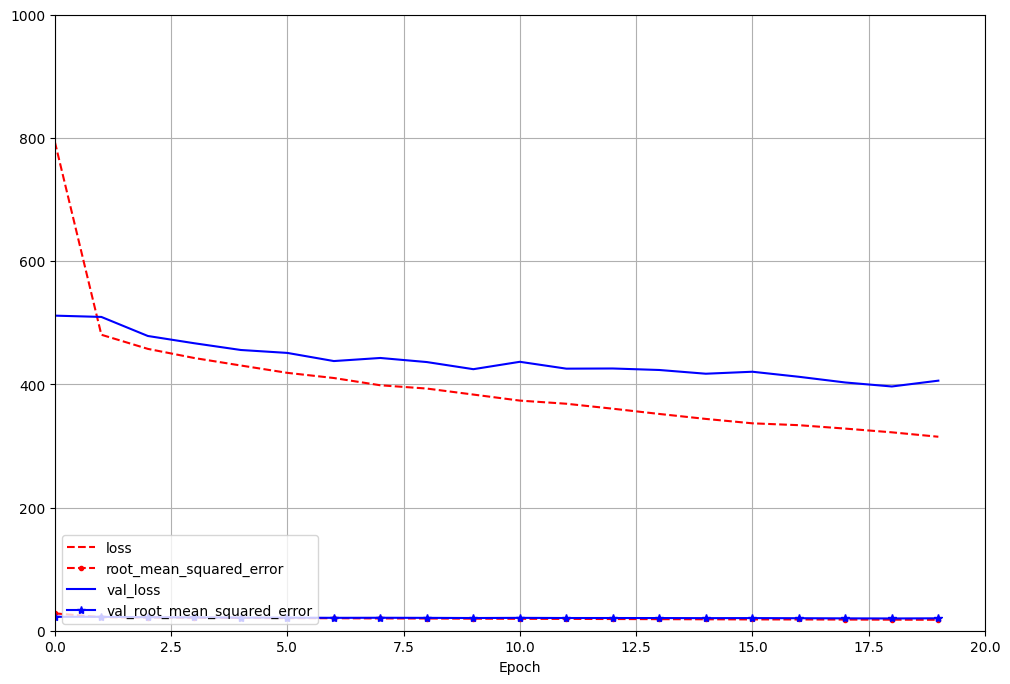

In [125]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(12, 8), xlim=[0, 20], ylim=[0, 1000], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [126]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

In [127]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [128]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
277/277 [==============================] - 2s 2ms/step - loss: 2476.3086 - root_mean_squared_error: 49.7625 - val_loss: 715.8365 - val_root_mean_squared_error: 26.7551
Epoch 2/20
277/277 [==============================] - 1s 2ms/step - loss: 1075.1515 - root_mean_squared_error: 32.7895 - val_loss: 572.5688 - val_root_mean_squared_error: 23.9284
Epoch 3/20
277/277 [==============================] - 1s 2ms/step - loss: 484.5715 - root_mean_squared_error: 22.0130 - val_loss: 452.6621 - val_root_mean_squared_error: 21.2759
Epoch 4/20
277/277 [==============================] - 1s 2ms/step - loss: 455.7203 - root_mean_squared_error: 21.3476 - val_loss: 451.2019 - val_root_mean_squared_error: 21.2415
Epoch 5/20
277/277 [==============================] - 1s 2ms/step - loss: 450.5179 - root_mean_squared_error: 21.2254 - val_loss: 464.2109 - val_root_mean_squared_error: 21.5456
Epoch 6/20
277/277 [==============================] - 1s 2ms/step - loss: 436.6414 - root_mean_squared_error

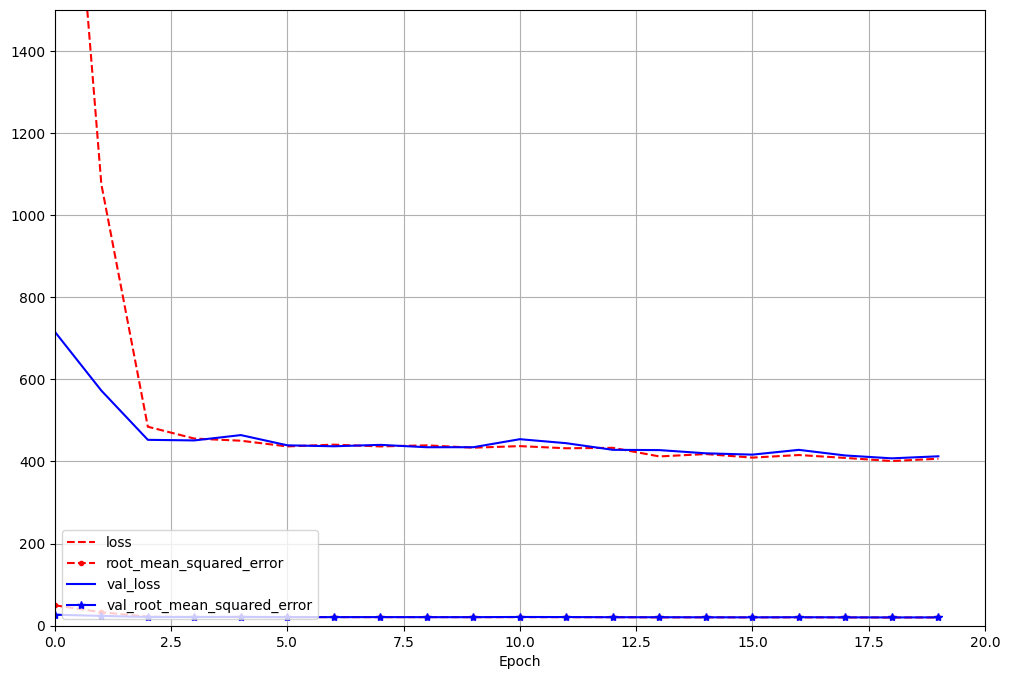

In [129]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(12, 8), xlim=[0, 20], ylim=[0, 1500], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [130]:
model.save("C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model" , save_format="tf")

INFO:tensorflow:Assets written to: C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model\assets


INFO:tensorflow:Assets written to: C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model\assets
